In [26]:
# import pandas as pd
# df = pd.read_csv('../Buoi1/dulieuxettuyendaihoc.csv',
#                  header=0,delimiter=','
#                  ,encoding='utf-8')

In [27]:
import pandas as pd
df = pd.read_csv('../Buoi1/dulieuxettuyendaihoc.csv',
           header=0,delimiter=','
           ,encoding='utf-8')
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [28]:
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']

dfKhoiC['M1'].describe()

count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

In [29]:
#Hãy kiểm tra xem trung bình M2 có bằng 6.7
dfKhoiC['M2'].mean()
#không bằng 6.7

4.232142857142857

In [30]:
# Câu 2: Hãy kiểm tra xem trung bình điểm thi M1 và 
# Trung bình điểm thi M2 của thí sinh thi khối C có bằng nhau không
# H0 = mean_M1 - mean_M2 =0
import scipy.stats as stats

stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)

dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)

from statsmodels.stats.weightstats import ztest as ztest

ztest(df['M1'], value=8.0)



(-29.907152266677993, 1.588509177330612e-196)

In [31]:
#kiểm tra điểm trung bình Z-test
ztest(df['M1'], df['M2'], value=0)

(-2.9004757923795, 0.0037259661678783573)

In [32]:
#Kiểm tra điểm trung binh M2, M3 có bằng nhau không với mức tin cậy 0,95%
ztest(df['M3'], df['M2'], value=0)

(4.172765180703833, 3.009250404643791e-05)

## 2. TWO SAMPLE Z_TEST
### nsample >= 30
### H0.Mx =My

In [33]:
#Kiểm định tương quan giữa 2 biến định lượng 
#H0: r=0
from scipy.stats.stats import pearsonr
#Câu 5 kiểm tra xem M1, M2 có tương quan không

pearsonr(df['M1'], df['M2'])
# Chấp nhận H0 -> M1 và M2 không tương quan
# VD đứa điểm M1 cao thì không thể kết luận M2 có cao hay không



/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_48252/2720566614.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.03515405725785026, pvalue=0.7284198928723623)

In [34]:
#Làm tương tự M1, M3
pearsonr(df['M1'], df['M3'])


PearsonRResult(statistic=0.018730760164383103, pvalue=0.853253434705502)

In [35]:
#M2,M3
pearsonr(df['M2'], df['M3'])

PearsonRResult(statistic=-0.09152288755408222, pvalue=0.3651344767496165)

## Phương pháp 6: kiểm tra độc lập của 2 biến đinh tính mà giá trị thể hiện của 2 biến là nhị phân
### Giả định 2 biến độc lập

In [36]:
import scipy.stats as stats
#Hãy kiêm tra xem có sự phụ thuộc nào giữa việc sinh viên có định và giới tính khi thí sinh đăng lý dự thi hay không
crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata
#Có 32 người chưa được đinh hướng 
#Lập bảng giúp phân tích biến định tính

NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [37]:
# Chấp nhận H0 -> 2 biến đọc laaoj với nhau 
# -> định hướng nghề nghiệp không phụ thuộc vào giới tính
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.575
p_value is : 0.22763927303454412


## Kiểm định Chi-Square

In [38]:
from scipy.stats import chi2_contingency #import chi-square
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdas

KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


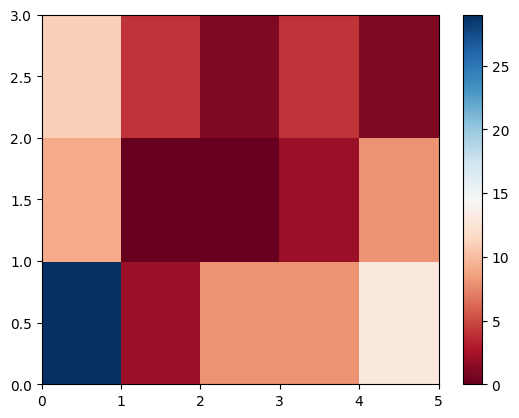

In [39]:

import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()

In [40]:
stat, p, dof, expected = chi2_contingency(crosdata)
#Chạy Chi-Square
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# -> 2 biến không độc lập 
# -> Phụ thuộc 
#e = 0.02012461887796485 < anpha = 0,06
#Không đủ dữ kiện KV và KT là độc lập hay có sự quan hệ giữa KT và KV
# Nếu khối thi và khu vực độc lập => không cộng điểm
# Nếu KT và KV phụ thuộc tức là => bạn được cộng điểm
#==> reject là bác bỏ H0(H0 là độc lập, nếu nó bác bỏ H0) -> phụ thuộc

p value is 0.02012461887796485
Dependent (reject H0)


In [41]:
#Giới tính và khối thi có mối quan hệ không
from scipy.stats import chi2_contingency #import chi-square
crosdata = pd.crosstab(df['GT'], [df['KT']], rownames=['GT'], colnames=['KT'])
stat, p, dof, expected = chi2_contingency(crosdata)
#Chạy Chi-Square
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#-> không độc lập-> phụ thuộc 

p value is 0.005044752209452435
Dependent (reject H0)


## 8. Kiểm tra trung bình giá trị theo nhóm
## Kiểm tra One way Anova
### H0 = Mean1 = Mean2 = Mean nhóm m

In [42]:
# Điểm M1 có phụ thuộc vào giới tính không
# Giả định rằng các điều kiện của dữ liệu thỏa mã sử dụng one-way
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# Đọc giá trị PR(>F) như vậy p-p_value = 0,444059
# -> lớn hơn anpha
# -> access -> MeanM1/nam = MeanM2/nu
#Điểm M1 độc lập với giới tính


,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


In [43]:
#điểm M2 có phụ thuộc vào khu vực hay không
model = ols('M2 ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
#-> Độc lập do > Anpha = 0,05

,df,sum_sq,mean_sq,F,PR(>F)
KV,2.0,6.053398,3.026699,2.790934,0.066299
Residual,97.0,105.194102,1.084475,NaN,NaN


In [44]:
#Điểm M3 có phụ thuộc vào khối thi hay không
model = ols('M3 ~ KT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
#-> Độc lập 

,df,sum_sq,mean_sq,F,PR(>F)
KT,4.0,3.967636,0.991909,0.911814,0.46041
Residual,95.0,103.344864,1.087841,NaN,NaN


## Kiểm tra trung bình Anova theo nhóm của nhóm

In [45]:
#Hãy cho biết điểm M1 có phụ thuộc vào loại giới tính trên từng nhóm KV hay không
#Performing two-way ANOVA
model = ols('M1 ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
#===>Điểm M1 PR(>F) trên từng nhóm giới tính độc lập với khu vực

            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN


In [46]:
#Phân tích xem M2 cps phụ thuộc trên nhóm KV theo từng loại KT hay không 
model = ols('M2 ~ KV + KT + KV:KT',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
#===>Điểm M2 PR(>F) với khu vực độc lập
# ====> M2 với KT không độc lập
# M2 trên từng khối thi -> Độc lập

            df     sum_sq   mean_sq         F    PR(>F)
KV         2.0   6.053398  3.026699  2.987203  0.055626
KT         4.0  10.061984  2.515496  2.482671  0.049539
KV:KT      8.0   8.688324  1.086040  1.071869  0.390293
Residual  87.0  88.150282  1.013222       NaN       NaN


## Phân tích hồi quy tuyến tính

In [47]:
#hãy cho biết sự ảnh hưởng của M1 đến M3
#Hàm hồi quy tuyến tính 
#f=A0+A2xX
#M3 = A0+A1xM1
#Tìm A0,A1
# A0: Hệ số tự do 
# A1: Hệ sống thông thưởng của M1 -> đi kiếm A1
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
#Đọc giá trị R-squared ra 0.00 -> M1 giải thích cho M3 là 0% -> không ý nghĩa
#Phải giải thích tối thiểu 50% -> 0.5 thì mô hình mới có ý nghĩa
#Prob (F-statistic) >0.05 nên mô hình không có giá trị 
#M3 = 4.8238 + 0.0137 x M1'''''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Sat, 07 Sep 2024   Prob (F-statistic):              0.853
Time:                        11:14:20   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

In [48]:
#giả sử thí sinh có điểm M1=6.7 thì hãy dự báo điểm M3 sẽ là bao nhiêu

In [49]:
#M3 = f(M1,M2)
#    = A0 +A1 x M1+A2 x M2 = 5.2006 + 0.0161 x M1 - 0.0906 x M2
#-> f(6.0,5.5) = 4.79
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1","M2"]].values) #Xây dựng tập biến độc lập 
y = df[['M3']].values#xây dựng tập biến phụ thuộc 
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
#M2 đối với M3 tác động nhiều hơn với M1 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4335
Date:                Sat, 07 Sep 2024   Prob (F-statistic):              0.649
Time:                        11:14:20   Log-Likelihood:                -144.98
No. Observations:                 100   AIC:                             296.0
Df Residuals:                      97   BIC:                             303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2006      0.508     10.241      0.0

In [50]:
X = df[["M1","M2"]].values
y = df[['M3']].values
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              500.8
Date:                Sat, 07 Sep 2024   Prob (F-statistic):                    3.54e-52
Time:                        11:14:20   Log-Likelihood:                         -181.63
No. Observations:                 100   AIC:                                      367.3
Df Residuals:                      98   BIC:                                      372.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------